# Week 09: Supervised Learning

## Drill

## Recap

This is a continuum of previous 2 week topics. Remember from the CRISP-DM from week 7? We have done: 
* Forming data analytics/ science project ideas
* Finding datasets
* Understand the datasets from EDA
* Using statistics to understand datasets, this sometimes is part of EDA

This week and next week is under the __Modelling__ step of CRISP-DM. In this week, we are building a class of machine learning models under supervised learning. 

## Supervised Learning

### But First...

Remember from week 7, every data analtics project starts from cleaning the data. The most common steps are:

* Sample the data 
* Impute missing data
* Remove duplicate data
* Inconsistent data
* Normalise numeric value
* Reduce dimensionality
* Add derived features
* Binning numeric value (into categories)
* Convert categorical variables into binary variables
* Select, combine, aggregate data

You must check if the dataset is good for feeding into the machine learning algorithm. 

## Regression

## Classification

* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* Decision Tree
* Random Forest
* Support Vector Machine

### Confusion Matrix

### Example: Random Forest

### Example: Interpreting Results using Logistic Regression

## Application: Classifying Texts

Now we have gone through the techniques of supervised learning, let us apply them on classifying texts. In this week, we will look at classifying positive and negative texts. This is useful when we are trying to find negative comments, fake news or spamming messages. 

In these examples it requires text data as inputs. Text is not numerical so we need to convert them to quantitative data. `sklearn` offers `.CountVectorizer()` which converts texts into their frequency counts. Let us see an example. 

In [17]:
# Try me
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Here’s to your health and the New Year.", 
          "Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 
          "You have every right to be angry, but that doesn't give you the right to be mean.", 
          "The hand sanitizer was actually very cold.", 
          "Sometimes you have to just give up and win by cheating.", 
          "The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 
          "After a long talk, they decided to break up.", 
          "She couldn't decide of the glass was half empty or half full so she drank it.", 
          "Malls are great places to shop; I can find everything I need under one roof.", 
          "His eyes met mine on the street.", 
          "She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 
          "She had that tint of craziness in her soul that made her believe she could actually make a difference.", 
          "Where do I put this box?", 
          "Mary plays the little lamb.", 
          "It isn't difficult to do a handstand if you just stand on your hands."]

vectoriser = CountVectorizer()  # We generate the CountVectorizer object first and use it to count from `corpus`
X = vectoriser.fit_transform(corpus)

The cell outputs a term-document matrix which shows the frequency of words appeared. This is done by `.fit_transform()`. Now `X` contains the frequency data and if we simply print it, it does not print the data that we wanted. The `CountVectorizer()` has an attribute called `vocabulary_` (There is an underscore at the end) which shows the frequency of each words appeared. 

In [18]:
vectoriser.vocabulary_

{'here': 56,
 'to': 111,
 'your': 125,
 'health': 53,
 'and': 4,
 'the': 106,
 'new': 80,
 'year': 123,
 'although': 3,
 'it': 63,
 'wasn': 119,
 'pot': 88,
 'of': 81,
 'gold': 44,
 'nancy': 77,
 'was': 118,
 'still': 102,
 'enthralled': 33,
 'at': 9,
 'what': 120,
 'she': 94,
 'found': 40,
 'end': 32,
 'rainbow': 90,
 'you': 124,
 'have': 52,
 'every': 34,
 'right': 91,
 'be': 10,
 'angry': 5,
 'but': 15,
 'that': 105,
 'doesn': 29,
 'give': 42,
 'mean': 74,
 'hand': 48,
 'sanitizer': 93,
 'actually': 1,
 'very': 117,
 'cold': 20,
 'sometimes': 99,
 'just': 64,
 'up': 116,
 'win': 122,
 'by': 16,
 'cheating': 19,
 'blinking': 12,
 'lights': 66,
 'antenna': 6,
 'tower': 112,
 'came': 17,
 'into': 60,
 'focus': 39,
 'as': 8,
 'heard': 54,
 'loud': 69,
 'snap': 96,
 'after': 2,
 'long': 68,
 'talk': 104,
 'they': 108,
 'decided': 25,
 'break': 14,
 'couldn': 22,
 'decide': 24,
 'glass': 43,
 'half': 47,
 'empty': 31,
 'or': 84,
 'full': 41,
 'so': 97,
 'drank': 30,
 'malls': 72,
 'are': 

Too difficult to read all of them? You can visualise them with a bar plot. 

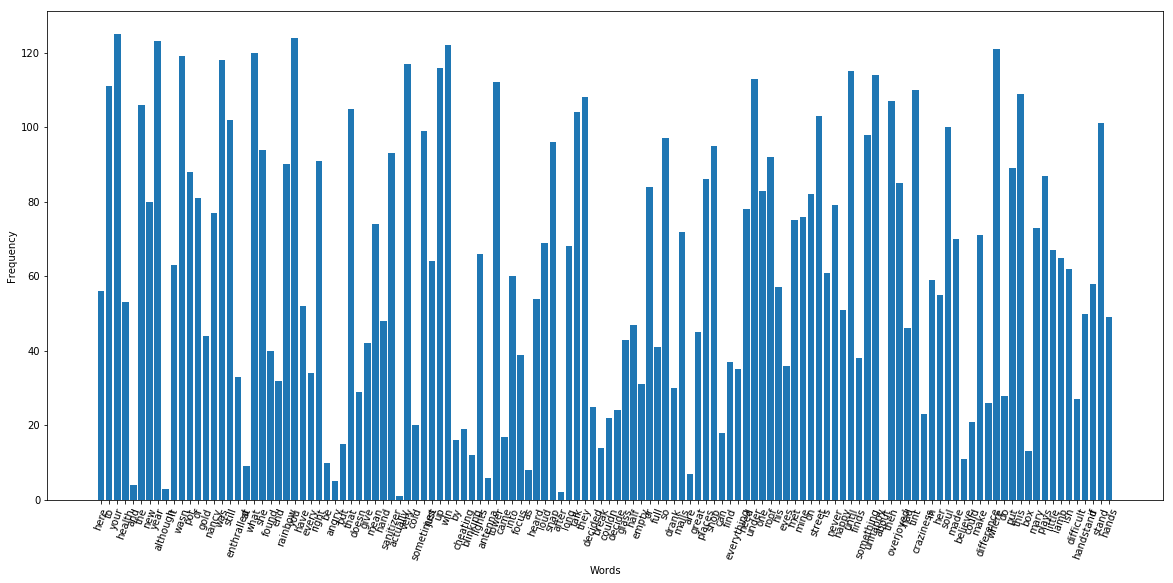

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,9))
plt.bar(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.values()), align='center')
plt.xticks(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.keys()), rotation=70)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

You can see that there are many words. Some of them are not necessary: They are the minor words that we use in conversations such as "and", "I" but they do not span anything meaningful. These are called __stopping words__ and too many unecessary words can contaminate our data quality. We can remove them in our analysis with the keyword `stop_words`. Let's see this in below: 

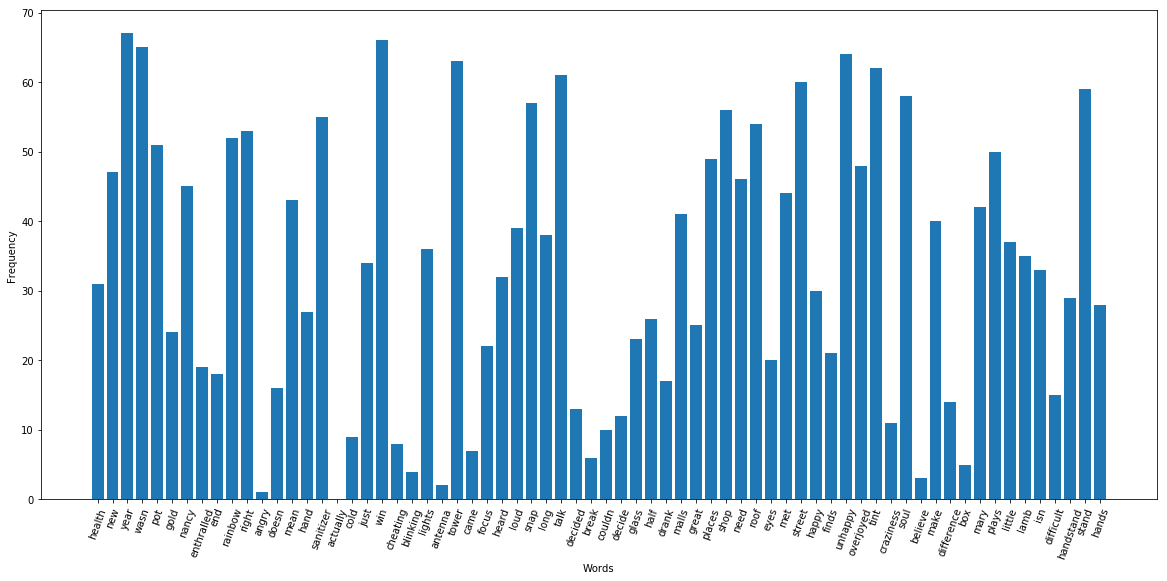

In [20]:
# Try me
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectoriser = CountVectorizer(stop_words="english")  # 
X = vectoriser.fit_transform(corpus)

plt.figure(figsize=(20,9))
plt.bar(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.values()), align='center')
plt.xticks(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.keys()), rotation=70)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Of course, since we are doing a supervised learning. Let us add the target variables. In this exercise, we are trying to find whether the texts are from a particular person or not. Hence we are able to recognise words choice of that person. In the following, we transformed the data so that it includes another column called `flag`. If `flag` is 1 then this means it is from that person, where else is 0. So let us obtain the data. 

In [21]:
# Run to get the data
text_data = [("Here's to your health and the New Year.", 0), 
          ("Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 0), 
          ("You have every right to be angry, but that doesn't give you the right to be mean.", 0), 
          ("The hand sanitizer was actually very cold.", 1), 
          ("Sometimes you have to just give up and win by cheating.", 1), 
          ("The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 0), 
          ("After a long talk, they decided to break up.", 0), 
          ("She couldn't decide of the glass was half empty or half full so she drank it.", 1), 
          ("Malls are great places to shop; I can find everything I need under one roof.", 0), 
          ("His eyes met mine on the street.", 0), 
          ("She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 0), 
          ("She had that tint of craziness in her soul that made her believe she could actually make a difference.", 0), 
          ("Where do I put this box?", 0), 
          ("Mary plays the little lamb.", 0), 
          ("It isn't difficult to do a handstand if you just stand on your hands.", 0),
          ("I made an effort to smile in front of others.",0),
          ("After exploring the abandoned building, he started to believe in ghosts. Sometimes he cannot sleep in night.",0),
          ("I don't except anybody who can tell the difference between Pepsi and Coke.",0),
          ("You can tweet whatever you want, at any time you want, as often as you want.",0),
          ("I was so mad that I yelled at him at the top of my lungs.",0),
          ("Your mom is so nice she gave me a ride home today. We had a chat.",0),
          ("What I remember is that she was with us at 8 pm. After that we have not heard anything.",0),
          ("There are few things better in life than a slice of pie.",1),
          ("Generally speaking, a woman will live longer than a man. Statistics shows that on average woman live around 80 years while men live around 84 years.",0),
          ("We have been convinced of this because the people who own everything also own the news.",0),
          ("This company is listed on the Paris stock exchange.",0),
          ("We have a big stove which keeps us very toasty.",0),
          ("Wes likes watching old movies on Sunday nights. This is when we sit together as a family.",0),
          ("I haven’t heard anything about him since you wrote to me.",0),
          ("Tom and Mary shared an umbrella However, it wasn't big enough and they both got wet.",0)
            ]
test_data = ["Here's to your health and the New Year.", 
          "Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 
          "You have every right to be angry, but that doesn't give you the right to be mean.", 
          "Excuse me sir I would like you to get me another drink.", 
          "Thank you for finishing the last slice of pizza!", 
          "The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 
          "After a long talk, they decided to break up.", 
          "She couldn't decide of the glass was half empty or half full so she drank it.", 
          "Malls are great places to shop; I can find everything I need under one roof.", 
          "His eyes met mine on the street.", 
          "She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 
          "She had that tint of craziness in her soul that made her believe she could actually make a difference.", 
          "Where do I put this box?",
          "25 years later, she still regretted that specific moment.",
          "As the rental car rolled to a stop on the dark road, she looked back to us.", 
          "That is an appealing treasure map that I can't read."
            ]

__Exercise:__ Write a code so that it transforms the data into a term-document matrix. 

In [ ]:
# Solution
vectoriser = CountVectorizer()  # We generate the CountVectorizer object first and use it to count from `corpus`
X = vectoriser.fit_transform([x[0] for x in text_data])

In [ ]:
# Your code below
vectoriser = 


__Exercise:__ Texts are unstructure data, then why do we classify this exercise as supervised learning?

We can now apply the machine learning into the term-document matrix. In here, you can choose either logistic regression or random forest or anything else. The part that you have to realise is, we still have the target variable to use. 

Before we finish this, let us talk about an adjustment to the count vectoriser. `sklearn` offers another vectoriser object called Term Frequency Inverse Document Frequency (TF-IDF). For example [this document](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a). 

__Exercise:__ This is often said to be improving the machine learning model. Why is that?

TF-IDF weighs more if the word appears more in a text piece/ document, but other documents might be irrelevant to this and does not include this specific keyword. TF-IDF optimises the results by rewarding the individual documents that are more relevant to topics. 

__Solution:__ The confusion here is that we link unstructure data into unsupervised learning. Truely it is hard to find the target variable from text variables. In this exercise, we entail each messages with a target variable, which is it is positive or not. 

## Conclusion